In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

plt.style.use('seaborn')

/tmp/ipykernel_64650/1428316514.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
with open('acoes6/equatorial.json') as f:
    data = json.load(f)

In [7]:
columns = list(data[0].keys())
rows = [list(i.values()) for i in data]
df = pd.DataFrame(rows, columns=columns)

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02 00:00:00,13.130,13.236,13.040,13.144,11.631297,2934000
1,2018-01-03 00:00:00,13.144,13.314,13.060,13.170,11.654305,2947500
2,2018-01-04 00:00:00,13.144,13.156,12.892,13.000,11.523095,7759000
3,2018-01-05 00:00:00,13.000,13.290,12.926,13.128,11.636556,4775000
4,2018-01-08 00:00:00,13.124,13.304,13.100,13.300,11.789013,4926500
...,...,...,...,...,...,...,...
241,2018-12-20 00:00:00,14.132,14.316,13.938,14.100,12.694479,4997500
242,2018-12-21 00:00:00,13.980,14.346,13.980,14.108,12.701681,6285000
243,2018-12-26 00:00:00,13.952,14.446,13.822,14.242,12.822324,3040500
244,2018-12-27 00:00:00,14.238,14.380,14.092,14.300,12.874541,2970500


In [10]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.993473,0.994747,0.986598,0.983171,-0.144202
High,0.993473,1.000000,0.995086,0.995132,0.992665,-0.116789
Low,0.994747,0.995086,1.000000,0.993936,0.989866,-0.153990
Close,0.986598,0.995132,0.993936,1.000000,0.997083,-0.131012
Adj Close,0.983171,0.992665,0.989866,0.997083,1.000000,-0.115697
Volume,-0.144202,-0.116789,-0.153990,-0.131012,-0.115697,1.000000


/home/smartgreen/.virtualenvs/analises/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


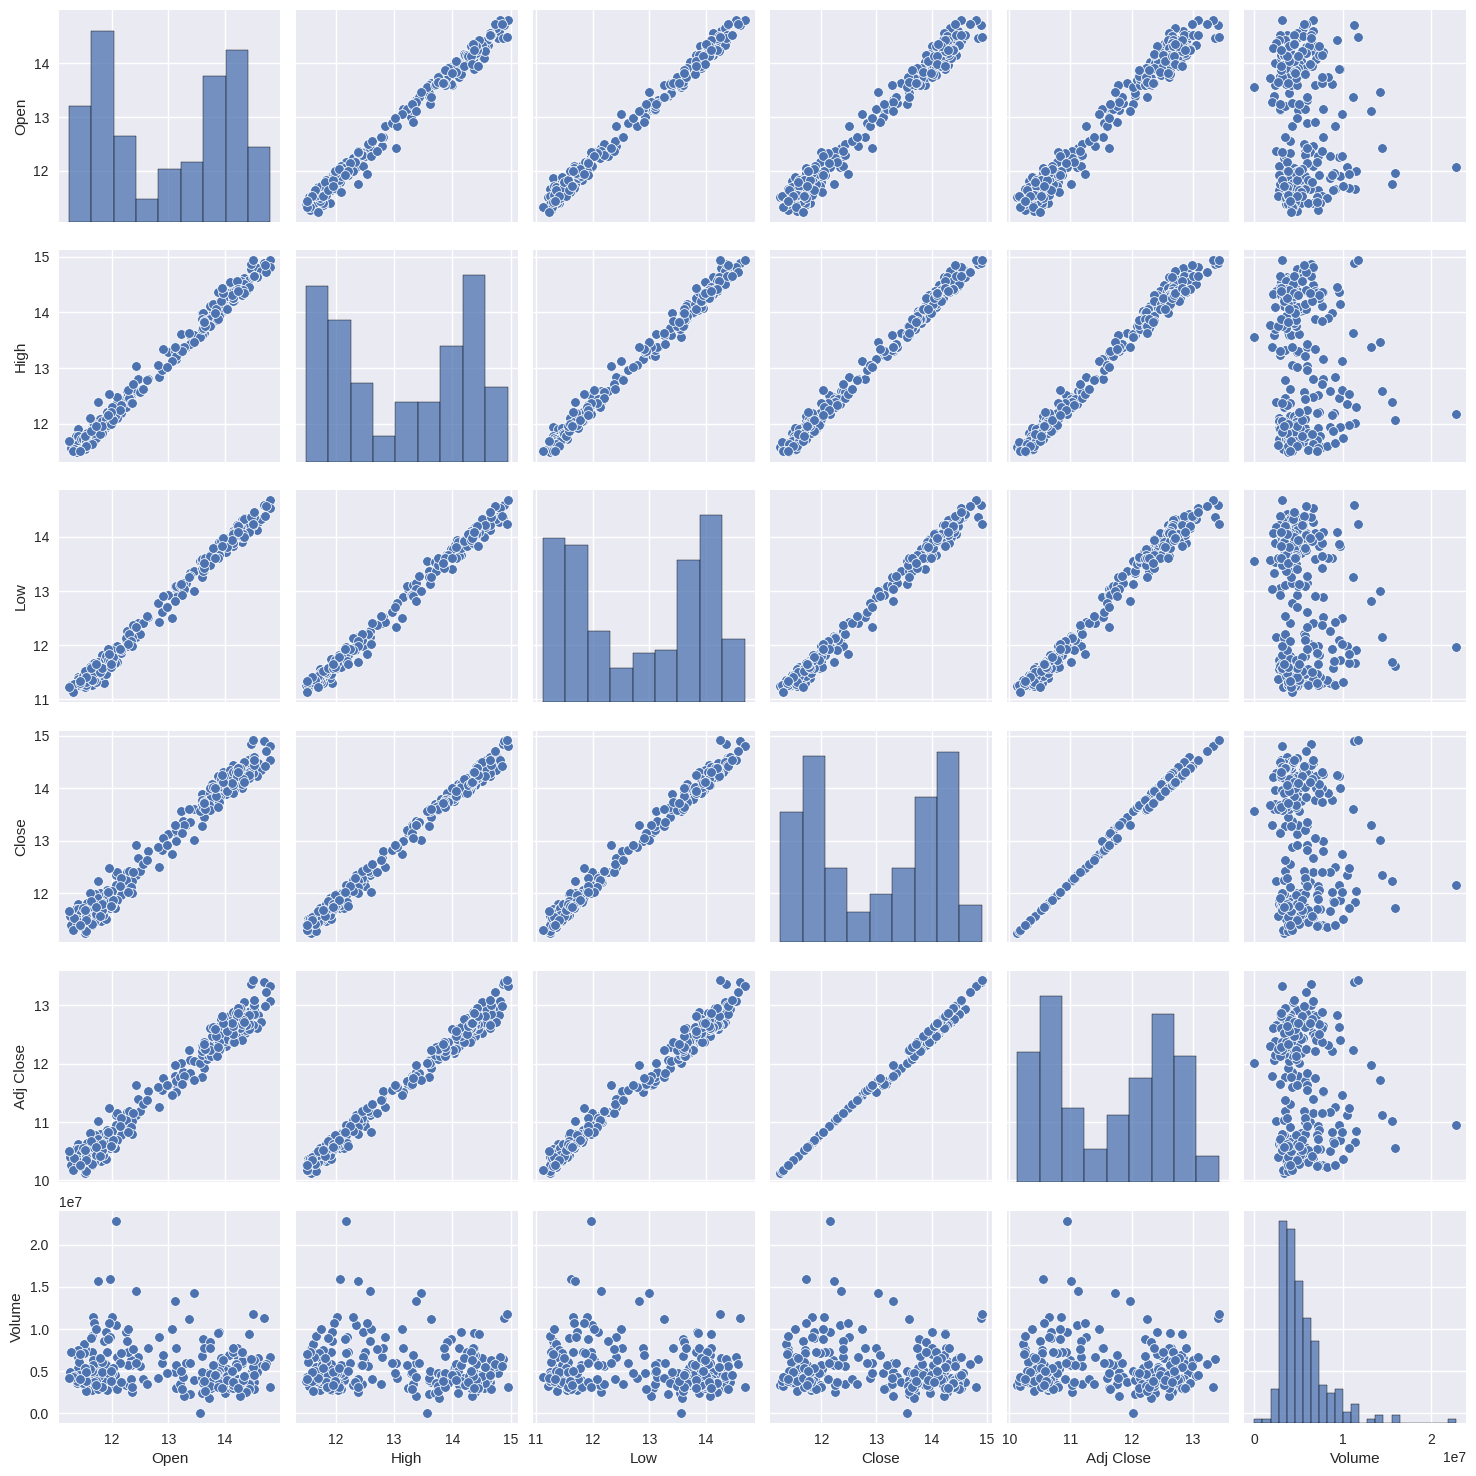

In [11]:
seaborn.pairplot(df)

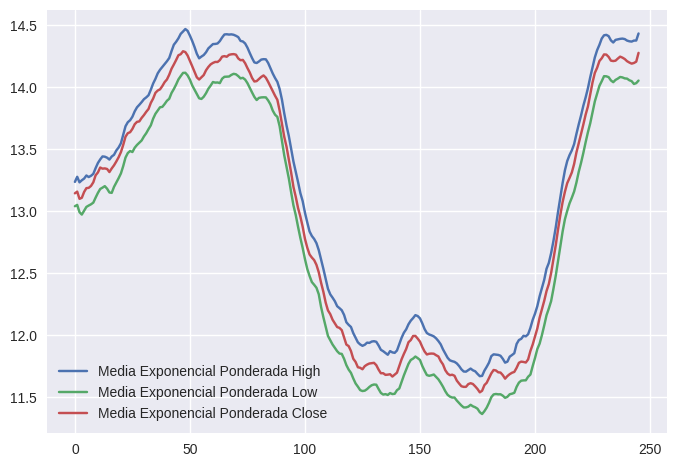

In [16]:
df.High.ewm(alpha=.1).mean().plot(label='Media Exponencial Ponderada High')
df.Low.ewm(alpha=.1).mean().plot(label='Media Exponencial Ponderada Low')
df.Close.ewm(alpha=.1).mean().plot(label='Media Exponencial Ponderada Close')
plt.legend()

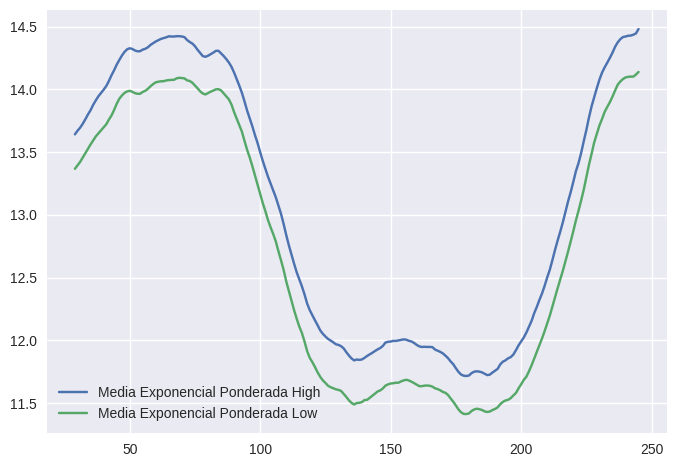

In [17]:
df.High.rolling(30).mean().plot(label='Media Exponencial Ponderada High')
df.Low.rolling(30).mean().plot(label='Media Exponencial Ponderada Low')
plt.legend()

<Axes: >

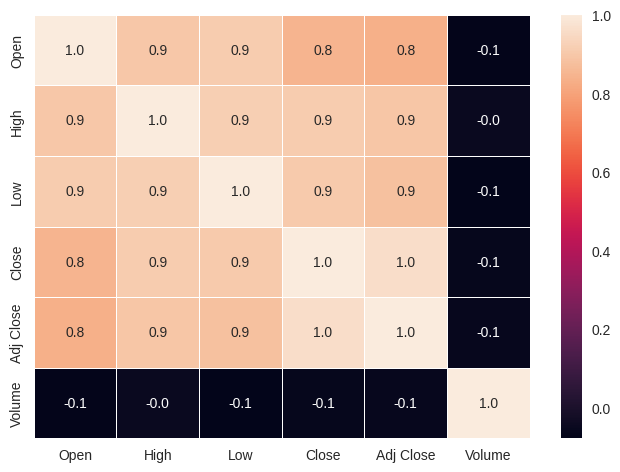

In [21]:
plot = seaborn.heatmap(df.corr(method='kendall'), annot = True, fmt=".1f", linewidths=.6)
plot